In [1]:
import numpy as np
import pandas as pd
from radioReduction import *
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.optimize as op
import random
import emcee
import corner
from astropy.stats import LombScargle


In [2]:
'''
Importing data
'''
e15 = pd.read_table('1314/dataTables/2M1314e15-LLRR.dat')
e18 = pd.read_table('1314/dataTables/2M1314e18-LLRR.dat')
e19 = pd.read_table('1314/dataTables/2M1314e19-LLRR.dat')

e15 = binning(e15,sec=10)
e18 = binning(e18,binning=2,sec=10)
e19 = binning(e19,binning=2,sec=10)


/home/russell/projects/radio_project/radioReduction.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['secs'] = data['dtmin']*60


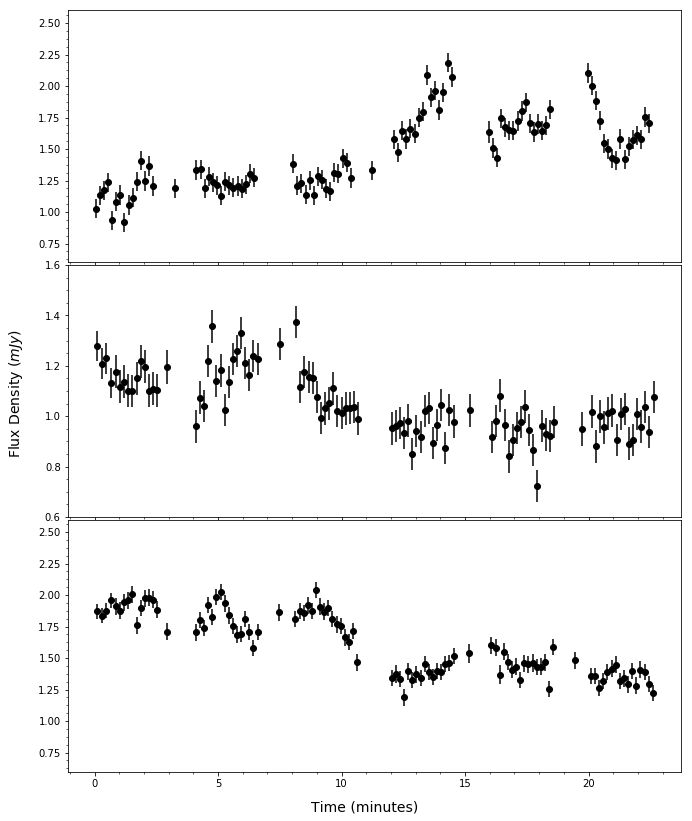

In [3]:
'''
Creating subplots of Stokes I
'''

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig, ax = plt.subplots(figsize=(11,14),nrows=3,ncols=1,sharex=True,gridspec_kw={'hspace':0.01})

ax[0].errorbar(e15['dtmin'],e15['re'],yerr=e15['ure'],color='k',linestyle='None',fmt='o',label='57634.10 MJD')
ax[0].set_ylim(0.6,2.6)
ax[0].minorticks_on()

ax[1].errorbar(e18['dtmin'],e18['re'],yerr=e18['ure'],color='k',linestyle='None',fmt='o',label='57704.82 MJD')
ax[1].set_ylim(0.6,1.6)
ax[1].minorticks_on()

ax[2].errorbar(e19['dtmin'],e19['re'],yerr=e19['ure'],color='k',linestyle='None',fmt='o',label='57771.53 MJD')
ax[2].set_ylim(0.6,2.6)
ax[2].minorticks_on()


# Set common labels
fig.text(0.5, 0.09, 'Time (minutes)', ha='center', va='center')
fig.text(0.06, 0.5, 'Flux Density ($mJy$)', ha='center', va='center', rotation='vertical')

plt.savefig('1314/plots/stepStokesI.png')
plt.show()

In [4]:
'''
Defining model funtions
'''

def linearModel(theta,x):
    '''
    Linear model fitting to the data
    '''
    m,b = theta
    y = m*x+b
    return y

def logModel(theta,x):
    '''
    Logistic model w/ added term y0 to translate it up
    '''
    l,k,x0,y0 = theta
    denom = 1+np.exp(-k*(x-x0))
    return y0+l/denom



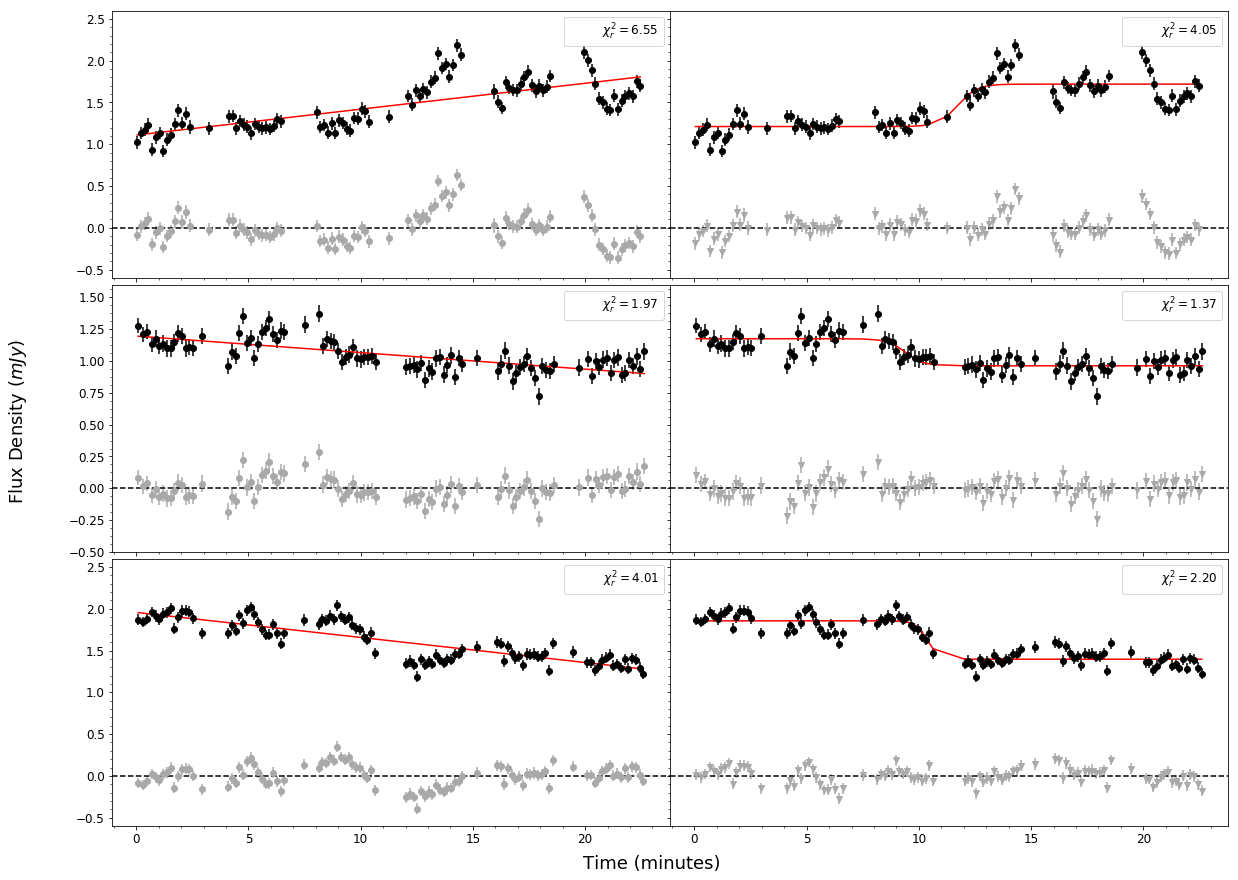

In [5]:
'''
Plotting models over light curves
'''

linE15 = [0.031,1.110]
logE15 = [0.50760,2.35315,11.74199,1.21234]

linE18 = [-0.013,1.196]
logE18 = [-0.21268,2.44581,9.40056,1.17493]

linE19 = [-0.030,1.957]
logE19 = [-0.45903,3.74855,10.37272,1.85553]

'''
Creating subplots of Stokes I
'''
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



'''
Plotting both log and linear models onto lightcurves with residuals
'''

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(figsize=(20,15),nrows=3,ncols=2,sharex=True,gridspec_kw={'hspace':0.025,'wspace':0.001})

# e15
ax1.plot([],[],' ',label='$\chi^2_r = 6.55$') # Puts chi square in legend
ax1.errorbar(e15['dtmin'],e15['re'],yerr=e15['ure'],color='k',linestyle='None',fmt='o',label='_nolegend_')
ax1.plot(e15['dtmin'],linearModel(linE15,e15['dtmin']),color='red',linestyle='-',label='_nolegend_')
ax1.errorbar(e15['dtmin'],(e15['re']-linearModel(linE15,e15['dtmin'])),yerr=e15['ure'],linestyle='None',color='darkgray',fmt='o')
ax1.axhline(y=0,color='k',linestyle='dashed')
ax1.set_ylim(-0.6,2.6)
ax1.legend(loc='best')
ax1.minorticks_on()

ax2.plot([],[],' ',label='$\chi^2_r = 4.05$') # Puts chi square in legend
ax2.errorbar(e15['dtmin'],e15['re'],yerr=e15['ure'],color='k',linestyle='None',fmt='o',label='_nolegend_')
ax2.plot(e15['dtmin'],logModel(logE15,e15['dtmin']),color='red',linestyle='-',label='_nolegend_')
ax2.errorbar(e15['dtmin'],(e15['re']-logModel(logE15,e15['dtmin'])),yerr=e15['ure'],linestyle='None',color='darkgray',fmt='v')
ax2.axhline(y=0,color='k',linestyle='dashed')
ax2.legend(loc='best')
ax2.set_ylim(-0.6,2.6)
ax2.minorticks_on()


# e18
ax3.plot([],[],' ',label='$\chi^2_r = 1.97$') # Puts chi square in legend
ax3.errorbar(e18['dtmin'],e18['re'],yerr=e18['ure'],color='k',linestyle='None',fmt='o',label='_nolegend_')
ax3.plot(e18['dtmin'],linearModel(linE18,e18['dtmin']),color='red',linestyle='-',label='_nolegend_')
ax3.errorbar(e18['dtmin'],(e18['re']-linearModel(linE18,e18['dtmin'])),yerr=e18['ure'],linestyle='None',color='darkgray',fmt='o')
ax3.axhline(y=0,color='k',linestyle='dashed')
ax3.legend(loc='best')
ax3.set_ylim(-0.5,1.6)
ax3.minorticks_on()

ax4.plot([],[],' ',label='$\chi^2_r = 1.37$') # Puts chi square in legend
ax4.errorbar(e18['dtmin'],e18['re'],yerr=e18['ure'],color='k',linestyle='None',fmt='o',label='_nolegend_')
ax4.plot(e18['dtmin'],logModel(logE18,e18['dtmin']),color='red',linestyle='-',label='_nolegend_')
ax4.errorbar(e18['dtmin'],(e18['re']-logModel(logE18,e18['dtmin'])),yerr=e18['ure'],linestyle='None',color='darkgray',fmt='v')
ax4.axhline(y=0,color='k',linestyle='dashed')
ax4.legend(loc='best')
ax4.set_ylim(-0.5,1.6)
ax4.minorticks_on()


# e19
ax5.plot([],[],' ',label='$\chi^2_r = 4.01$') # Puts chi square in legend
ax5.errorbar(e19['dtmin'],e19['re'],yerr=e19['ure'],color='k',linestyle='None',fmt='o',label='_nolegend_')
ax5.plot(e19['dtmin'],linearModel(linE19,e19['dtmin']),color='red',linestyle='-',label='_nolegend_')
ax5.errorbar(e19['dtmin'],(e19['re']-linearModel(linE19,e19['dtmin'])),yerr=e19['ure'],linestyle='None',color='darkgray',fmt='o')
ax5.axhline(y=0,color='k',linestyle='dashed')
ax5.legend(loc='best')
ax5.set_ylim(-0.6,2.6)
ax5.minorticks_on()

ax6.plot([],[],' ',label='$\chi^2_r = 2.20$') # Puts chi square in legend
ax6.errorbar(e19['dtmin'],e19['re'],yerr=e19['ure'],color='k',linestyle='None',fmt='o',label='_nolegend_')
ax6.plot(e19['dtmin'],logModel(logE19,e19['dtmin']),color='red',linestyle='-',label='_nolegend_')
ax6.errorbar(e19['dtmin'],(e19['re']-logModel(logE19,e19['dtmin'])),yerr=e19['ure'],linestyle='None',color='darkgray',fmt='v')
ax6.axhline(y=0,color='k',linestyle='dashed')
ax6.legend(loc='best')
ax6.set_ylim(-0.6,2.6)
ax6.minorticks_on()


for ax in fig.get_axes():
    ax.label_outer()

# Set common labels
fig.text(0.5, 0.09, 'Time (minutes)', ha='center', va='center')
fig.text(0.06, 0.5, 'Flux Density ($mJy$)', ha='center', va='center', rotation='vertical')

plt.savefig('1314/plots/stepModels.png')
plt.show()


In [4]:
'''
Importing data
'''
e15_ll = pd.read_table('1314/dataTables/2M1314e15-LL.dat')
e15_rr = pd.read_table('1314/dataTables/2M1314e15-RR.dat')

e18_ll = pd.read_table('1314/dataTables/2M1314e18-LL.dat')
e18_rr = pd.read_table('1314/dataTables/2M1314e18-RR.dat')

e19_ll = pd.read_table('1314/dataTables/2M1314e19-LL.dat')
e19_rr = pd.read_table('1314/dataTables/2M1314e19-RR.dat')

e15_ll = binning(e15_ll,sec=10)
e15_rr = binning(e15_rr,sec=10)

e18_ll = binning(e18_ll,binning=2,sec=10)
e18_rr = binning(e18_rr,binning=2,sec=10)

e19_ll = binning(e19_ll,binning=2,sec=10)
e19_rr = binning(e19_rr,binning=2,sec=10)



/home/russell/projects/radio_project/radioReduction.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['secs'] = data['dtmin']*60


In [10]:
e15_V = (e15_rr['re'] - e15_ll['re'])*0.5
e18_V = (e18_rr['re'] - e18_ll['re'])*0.5
e19_V = (e19_rr['re'] - e19_ll['re'])*0.5

e15_Verr = np.sqrt(e15_rr['ure']**2 + e15_ll['ure']**2)*0.5
e18_Verr = np.sqrt(e18_rr['ure']**2 + e18_ll['ure']**2)*0.5
e19_Verr = np.sqrt(e19_rr['ure']**2 + e19_ll['ure']**2)*0.5


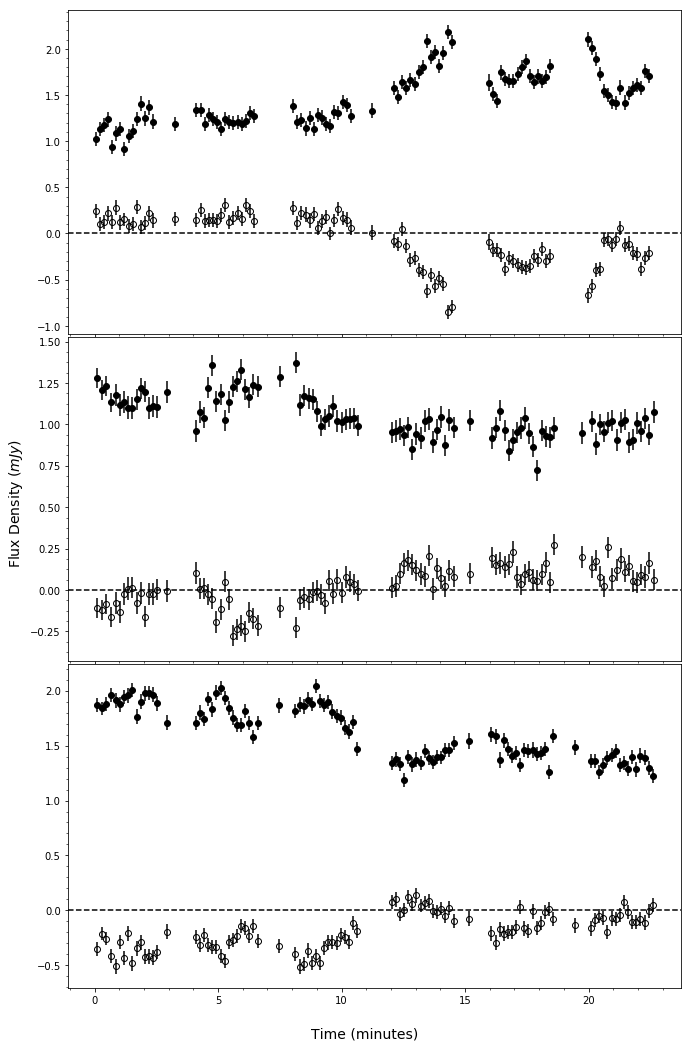

In [40]:
'''
Creating subplots of Stokes I
'''

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig, ax = plt.subplots(figsize=(11,18),nrows=3,ncols=1,sharex=True,gridspec_kw={'hspace':0.01})

ax[0].errorbar(e15['dtmin'],e15['re'],yerr=e15['ure'],color='k',linestyle='None',fmt='o',label='57634.10 MJD')
ax[0].errorbar(e15['dtmin'],e15_V,yerr=e15_Verr,color='k',linestyle='None',fmt='o',markerfacecolor='none')
ax[0].axhline(y=0,color='k',linestyle='dashed')
ax[0].minorticks_on()

ax[1].errorbar(e18['dtmin'],e18['re'],yerr=e18['ure'],color='k',linestyle='None',fmt='o',label='57704.82 MJD')
ax[1].errorbar(e18['dtmin'],e18_V,yerr=e18_Verr,color='k',linestyle='None',fmt='o',markerfacecolor='none')
ax[1].axhline(y=0,color='k',linestyle='dashed')
ax[1].minorticks_on()

ax[2].errorbar(e19['dtmin'],e19['re'],yerr=e19['ure'],color='k',linestyle='None',fmt='o',label='57771.53 MJD')
ax[2].errorbar(e19['dtmin'],e19_V,yerr=e19_Verr,color='k',linestyle='None',fmt='o',markerfacecolor='none')
ax[2].axhline(y=0,color='k',linestyle='dashed')
ax[2].minorticks_on()


# Set common labels
fig.text(0.5, 0.09, 'Time (minutes)', ha='center', va='center')
fig.text(0.06, 0.5, 'Flux Density ($mJy$)', ha='center', va='center', rotation='vertical')

plt.savefig('1314/plots/stepStokes.png')
plt.show()

In [28]:
e15_h = pd.read_table('1314/dataTables/2M1314e15-7GHz.dat')
e15_l = pd.read_table('1314/dataTables/2M1314e15-5GHz.dat')

e15_h = e15_h[e15_h['nsamp']>3000]
e15_l = e15_l[e15_l['nsamp']>3000]

e15_h = binning(e15_h,10)
e15_l = binning(e15_l,10)


e18_h = pd.read_table('1314/dataTables/2M1314e18-7GHz.dat')
e18_l = pd.read_table('1314/dataTables/2M1314e18-5GHz.dat')

e18_h = e18_h[e18_h['nsamp']>3000]
e18_l = e18_l[e18_l['nsamp']>3000]

e18_h = binning(e18_h,binning=2,sec=10)
e18_l = binning(e18_l,binning=2,sec=10)



e19_h = pd.read_table('1314/dataTables/2M1314e19-7GHz.dat')
e19_l = pd.read_table('1314/dataTables/2M1314e19-5GHz.dat')

e19_h = e19_h[e19_h['nsamp']>3000]
e19_l = e19_l[e19_l['nsamp']>3000]

e19_h = binning(e19_h,binning=2,sec=10)
e19_l = binning(e19_l,binning=2,sec=10)










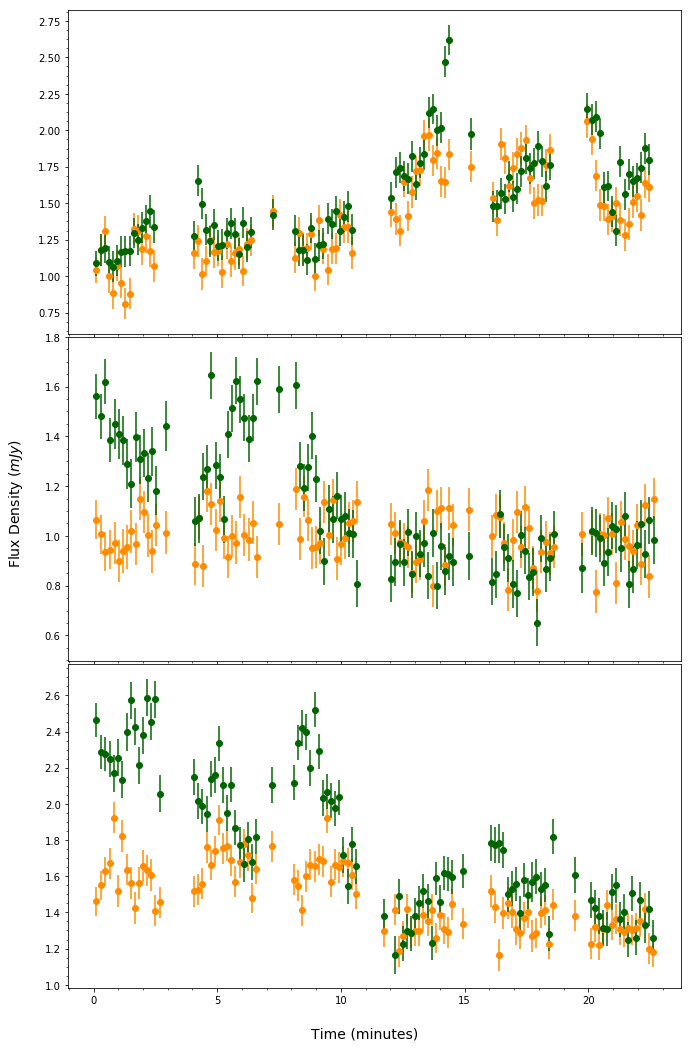

In [39]:
'''
Creating subplots of Stokes I
'''

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig, ax = plt.subplots(figsize=(11,18),nrows=3,ncols=1,sharex=True,gridspec_kw={'hspace':0.01})

ax[0].errorbar(e15_h['dtmin'],e15_h['re'],yerr=e15_h['ure'],color='darkorange',linestyle='None',fmt='o')
ax[0].errorbar(e15_l['dtmin'],e15_l['re'],yerr=e15_l['ure'],color='darkgreen',linestyle='None',fmt='o')
ax[0].minorticks_on()

ax[1].errorbar(e18_h['dtmin'],e18_h['re'],yerr=e18_h['ure'],color='darkorange',linestyle='None',fmt='o')
ax[1].errorbar(e18_l['dtmin'],e18_l['re'],yerr=e18_l['ure'],color='darkgreen',linestyle='None',fmt='o')
ax[1].minorticks_on()

ax[2].errorbar(e19_h['dtmin'],e19_h['re'],yerr=e19_h['ure'],color='darkorange',linestyle='None',fmt='o')
ax[2].errorbar(e19_l['dtmin'],e19_l['re'],yerr=e19_l['ure'],color='darkgreen',linestyle='None',fmt='o')
ax[2].minorticks_on()


# Set common labels
fig.text(0.5, 0.09, 'Time (minutes)', ha='center', va='center')
fig.text(0.06, 0.5, 'Flux Density ($mJy$)', ha='center', va='center', rotation='vertical')

plt.savefig('1314/plots/stepSED.png')
plt.show()